In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


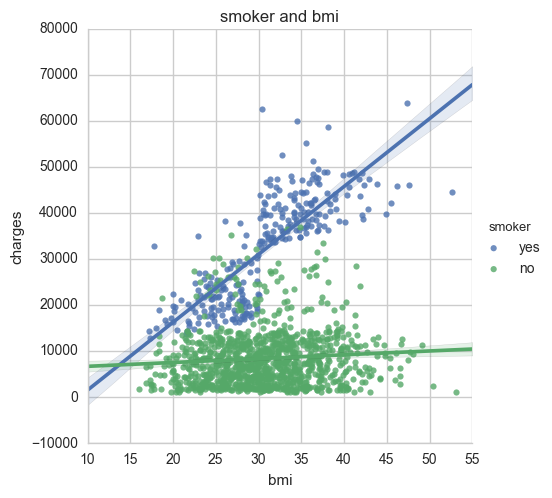

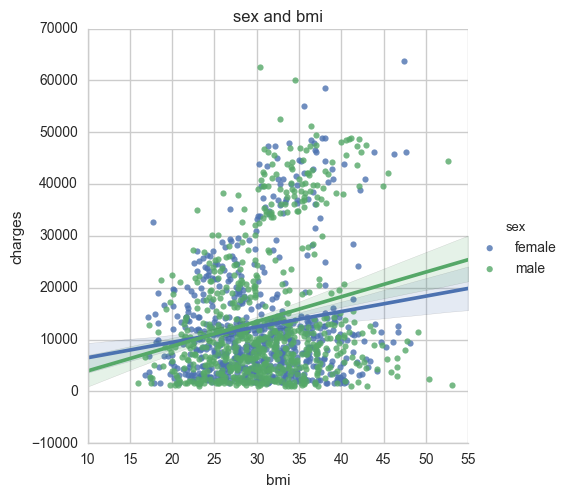

In [5]:
cols = ['smoker', 'sex']
log_y = np.log(df['charges'])
for c in cols:
    sns.lmplot(x='bmi', y='charges', hue=c, data=df)
    plt.title(str(c) + ' and bmi')

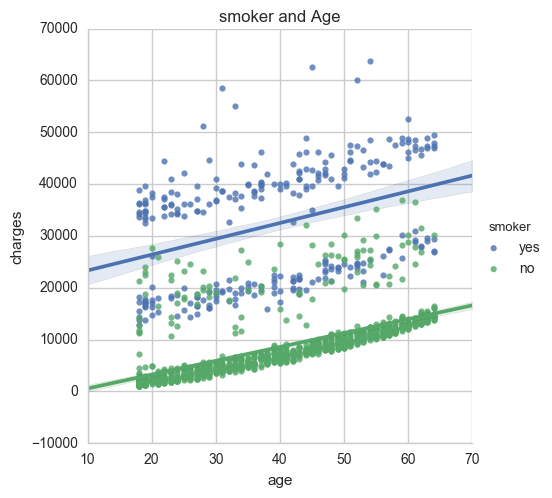

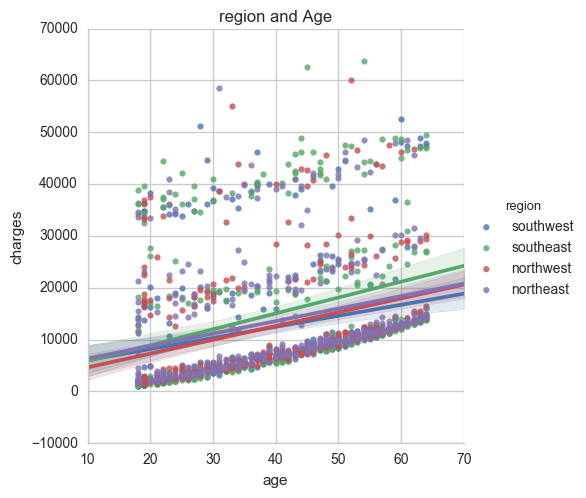

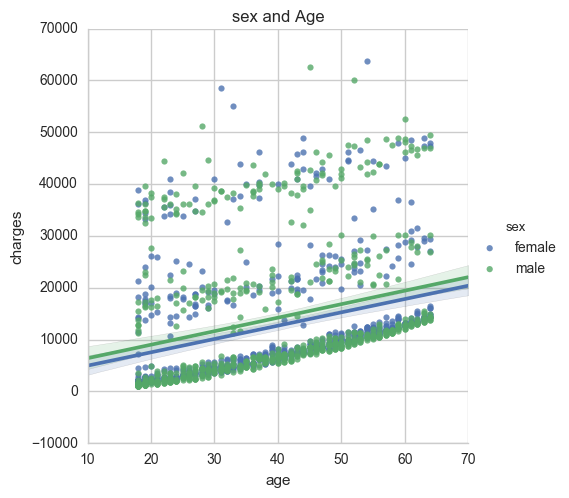

In [6]:
cols = ['smoker', 'region', 'sex']
for c in cols:
    sns.lmplot(x='age', y='charges', data=df, hue=str(c))
    plt.title(str(c) + ' and Age')

In [7]:
df['sex'] = df['sex'].map({'female':1, 'male':0})

In [8]:
df = pd.get_dummies(columns=['region'], data=df )

In [9]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,yes,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,no,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,no,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,no,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,no,3866.85520,0.0,1.0,0.0,0.0


In [10]:
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

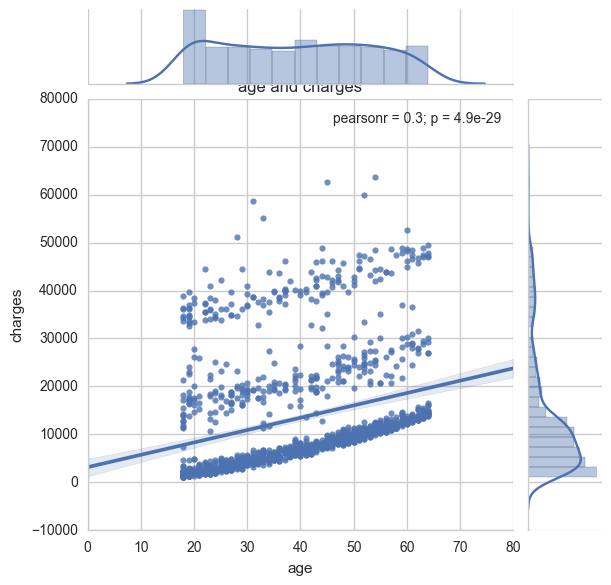

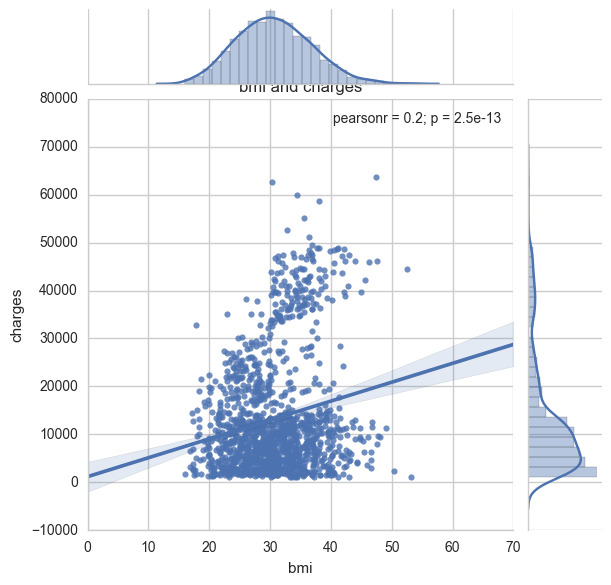

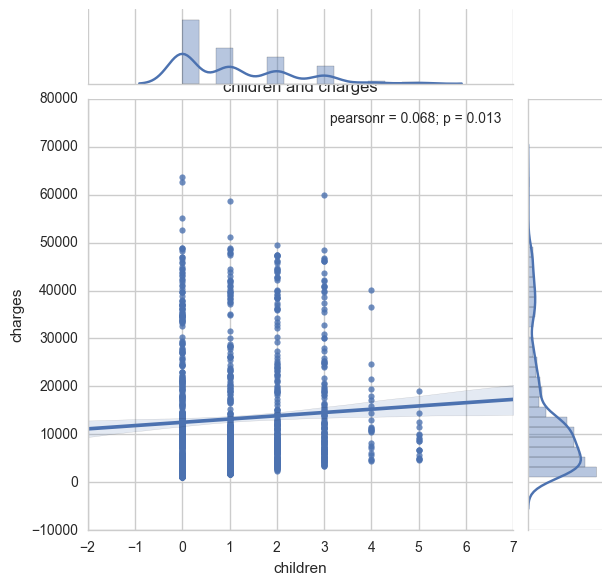

In [11]:
cols = ['age','bmi','children']
for c in cols:
    sns.jointplot(x=df[c], y=df['charges'], kind='reg')
    plt.title(str(c) + ' and charges')


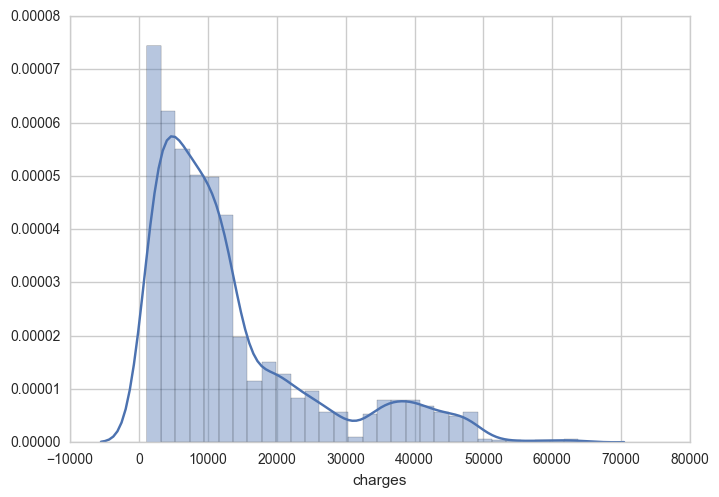

In [12]:
sns.distplot(df['charges'])

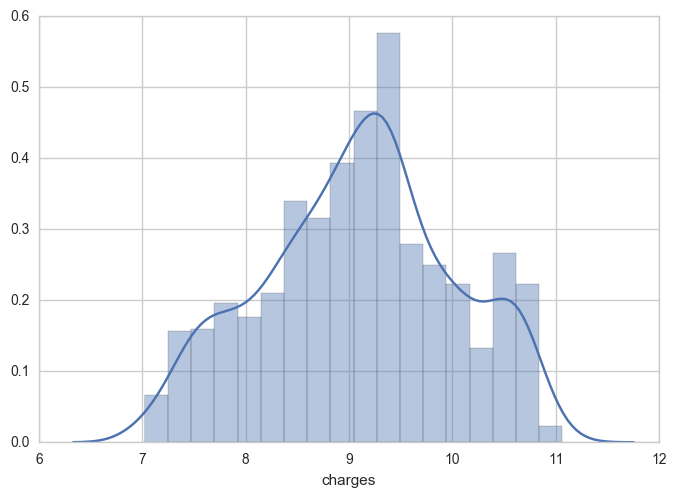

In [13]:
sns.distplot(np.log(df['charges']))

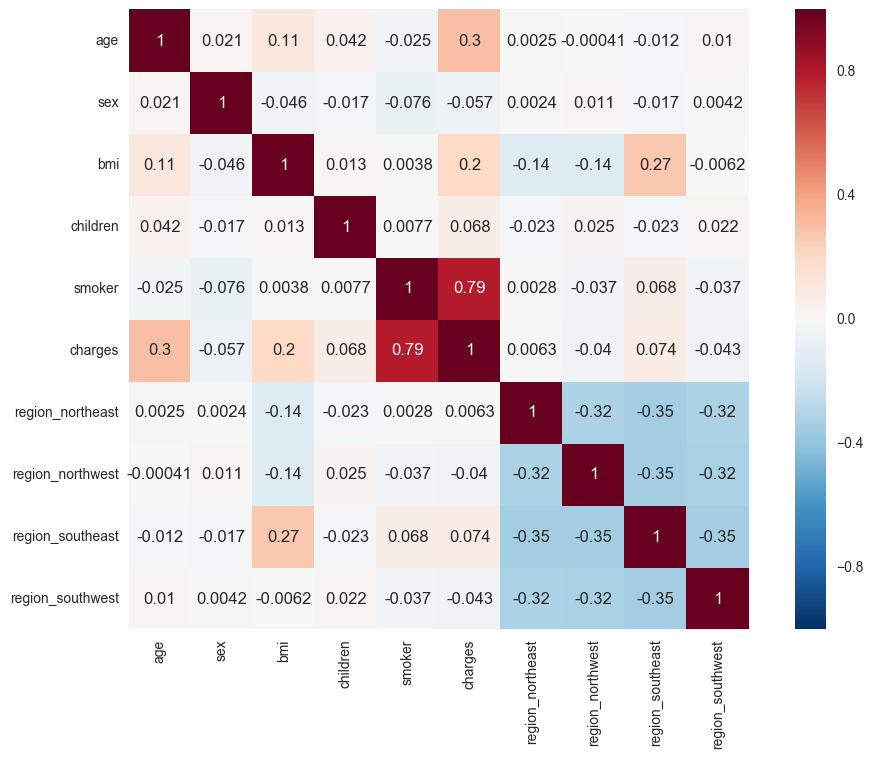

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),square=True, annot=True)

In [15]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [16]:
feature_cols = df.columns.drop(labels='charges').tolist()

In [17]:
for c in feature_cols:
    r, pval = stats.pearsonr(df['charges'], df[c])
    print (r,pval, c)

(0.29900819333064765, 4.886693331722474e-29, 'age')
(-0.057292062202025366, 0.03613272100596256, 'sex')
(0.19834096883362887, 2.459085535118864e-13, 'bmi')
(0.0679982268479048, 0.012852128520146867, 'children')
(0.7872514304984772, 8.271435842183907e-283, 'smoker')
(0.006348771280156068, 0.8165263815338886, 'region_northeast')
(-0.03990486404043799, 0.1445969879937643, 'region_northwest')
(0.07398155156575976, 0.006782698910664397, 'region_southeast')
(-0.04321002899168474, 0.11414659361891082, 'region_southwest')


In [18]:
X_VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame(zip(X_VIF, X.columns), columns=['VIF', 'Column_Name'])

NameError: name 'X' is not defined

## Machine Learning

First with statsmodels and then SKlearn.

In [ ]:
X = df.drop(labels=['charges','region_northeast', 'region_northwest','region_southeast','region_southwest'], axis=1)
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:
training_model = sm.OLS(np.log(y_train), X_train).fit()
print (training_model.summary())


In [ ]:
sns.residplot(x=training_model.fittedvalues, y=training_model.resid)
plt.show()
stats.probplot(training_model.resid, plot=plt)
plt.show()
sns.distplot(training_model.resid)
plt.show()

In [ ]:
testing_model = sm.OLS(np.log(y_test), X_test).fit()
print (testing_model.summary())

In [ ]:
sns.residplot(x=testing_model.fittedvalues, y=testing_model.resid)
plt.show()
stats.probplot(testing_model.resid, plot=plt)
plt.show()
sns.distplot(testing_model.resid)
plt.show()

In [ ]:
model_1 = sm.ols('np.log(charges) ~age + C(sex)+ bmi + children + C(smoker)',data=df).fit()
print (model_1.summary())

In [ ]:
sns.residplot(x=model_1.fittedvalues, y=model_1.resid)
plt.show()
stats.probplot(model_1.resid, plot=plt)
plt.show()
sns.distplot(model_1.resid)
plt.show()

In [ ]:
model = sm.OLS(np.log(y),X).fit()
predictions = model.predict(X)
print (model.summary())

In [ ]:
model.params * 100

In [ ]:
sns.residplot(x=model.fittedvalues, y=model.resid)
plt.show()
stats.probplot(model.resid, plot=plt)
plt.show()
sns.distplot(model.resid)
plt.show()

In [ ]:
np.exp(model.predict(exog=[28, 0, 26.6, 0, 0]))

## Using Scikit-Learn 

In [ ]:
lm = LinearRegression(fit_intercept=False)
m = lm.fit(X,np.log(y))
m.coef_

## Results:
There is a 6.72% increase of insurance charges as a person ages by one year. If the person is female, the insurance charges will increase by 58.01%. For ever unit of bmi, there is a 17.38% increase of insurance charges. And also, as the number of children increases thre is also a 23.2% increase of insurance as well. If the person is also a smoker, then the insurance cost increases by 187.25%, which is significantly high. Therefore, one should not smoke. 